In [1]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Generate Data Points
mu = 1.5
sigma = 0.2
X_Data = np.linspace(0, 10, 20) + (sigma*np.random.randn(20) + mu)
X_Data = X_Data.reshape(20, 1)
Y_Data = np.linspace(0, 10, 20) + (sigma*np.random.randn(20) + mu)
Y_Data = Y_Data.reshape(20, 1)

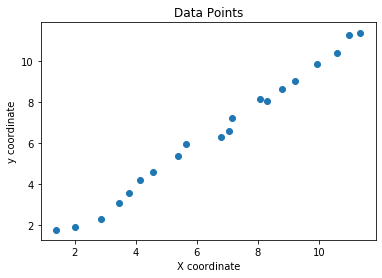

In [3]:
# Display Data Points
plt.scatter(X_Data, Y_Data)
plt.xlabel('X coordinate')
plt.ylabel('y coordinate')
plt.title('Data Points')
plt.show()

In [4]:
# random initialization
m = torch.tensor([np.random.randn()], requires_grad=True)
c = torch.tensor([np.random.randn()], requires_grad=True)

In [5]:
eta = 0.001     # learning rate (step-size)
indices_list = list(range(len(X_Data)))
loss_history = []

for epoch in range(5):
    random.shuffle(indices_list)  # shuffle indices before every epoch
    for step in indices_list:     # loop through indices
        # Converting to Tensor
        x = torch.from_numpy(X_Data[step])
        y = torch.from_numpy(Y_Data[step])
        
        # Forward
        y_pred = m*x + c
        
        # Compute Loss
        #loss = torch.sum((y_pred - y)**2)/(2*y.numel())
        loss = ((y_pred - y)**2)/2
        
        # Backward
        loss.backward()
        
        # Update
        m.data = m.data - eta * m.grad.data
        c.data = c.data - eta * c.grad.data
        
        m.grad.data.zero_()
        c.grad.data.zero_()
        
        loss_history.append(loss.item())
    print('Epoch:', epoch, '| Loss:', loss_history[-1])

Epoch: 0 | Loss: 0.8867034662299589
Epoch: 1 | Loss: 0.3853381415334044
Epoch: 2 | Loss: 0.04768345232815454
Epoch: 3 | Loss: 0.02360759406684393
Epoch: 4 | Loss: 0.00018932674416679708


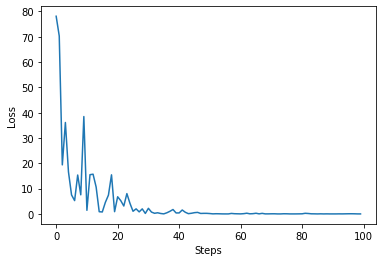

In [6]:
# Plot Loss History
axis = np.arange(5*len(X_Data))
plt.plot(axis, loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

In [7]:
print(m.data, c.data)

tensor([1.0244]) tensor([-0.3332])


In [8]:
# Here we will run over the complete data to see the line of best fit, learned by the network
# (Although one could use just two data points to draw a line)
pred_list = []
with torch.no_grad():
    for step in range(len(X_Data)):
        x = torch.from_numpy(X_Data[step])
        y = torch.from_numpy(Y_Data[step])

        # Forward
        y_pred = m*x + c

        pred_list.append(y_pred.item())

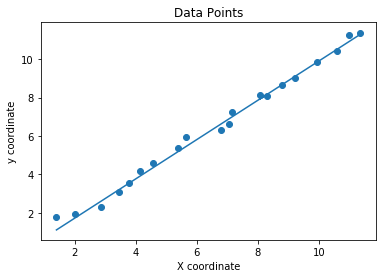

In [9]:
# Display Data Points
plt.scatter(X_Data, Y_Data)
plt.xlabel('X coordinate')
plt.ylabel('y coordinate')
plt.title('Data Points')

# Display Prediction
plt.plot(X_Data, pred_list)
plt.show()